<a href="https://colab.research.google.com/github/algostrat/a6/blob/main/a6_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





> # ***Assignment 6***

_______________________________________________________________________________________________________________________________
####**Team Members:**
Ryan Wahler , Sean Ciser , Kelly Navarro Zambrano.
####**Date:**
July 12th, 2021
####**Course:**
Python Programming  COP4045
_______________________________________________________________________________________________________________________________

The following prompts you to upload the iris.csv file from your local machine. The file name must be called 'iris.csv'. The raw file can be found here https://gist.githubusercontent.com/algostrat/83fa0e3f7af0b5debf2138ad88cfeb65/raw/626e0a780bad37d85a6f98672276f7d7547f1aef/iris.csv

In [ ]:
from google.colab import files
print("\nUpload iris.csv file from your local machine:\n")
uploaded = files.upload()


Upload iris.csv file from your local machine:



Saving iris.csv to iris.csv


##**PART 2**


Below we are getting the data from iris.csv file and creating a dictionary of dictionaries of lists and calling it 'df'. The outer most keys are the flower species and the "inner" keys are the attributes where the values are lists for each observation in order. For example, accessing the sepal length of the 5th observed setosa flower would be accessed by `df['setosa']['sepal_length'][4]`

The data gathering is wrapped in a function called get_data. The file name must be be the correct name and data, called iris.csv. No assertion or checking is performed.

In [9]:
import csv
from copy import deepcopy # required when trying to deepcopy a dict with nest lists


def get_data():
    
    file = 'iris.csv'
    
    #Attributes dictionary
    attributes = {'sepal_length':[],'sepal_width':[],'petal_length':[],'petal_width':[]}
    df = {'setosa':deepcopy(attributes),'versicolor':deepcopy(attributes),'virginica':deepcopy(attributes)}

    with open(file, 'r') as csv_file:
        
        reader = csv.reader(csv_file)
        next(reader)
        
        for row in reader:
            try:
                # get the values to df
                #df[species][in'sepal_length','sepal_width','petal_length',or 'petal_width']
                df[row[4]]['sepal_length'].append(float(row[0]))
                df[row[4]]['sepal_width'].append(float(row[1]))
                df[row[4]]['petal_length'].append(float(row[2]))
                df[row[4]]['petal_width'].append(float(row[3]))
            except:
                print("error")      
    return df

df = get_data()

This portion will calculates summary statistics across all species together. For instance, the average for sepal length will be the average across all species. The following cell will calculate minimum, maximum, mean, and standard deviation of each attribute. List comprehensions were used to keep the code "pythonic" and short. The data structure for the summary statistics is composed as follows, a dictionary with summary statistics as the keys and each value another dictionary for each attribute. Thus there are 5 statistics, 4 attributes, and 5*4 = 20 individual statistics. Deep copy is used again because this function is capable of creating deep copies of nested dictionaries. 




In [10]:
from copy import deepcopy # required when trying to deepcopy a dict with nest lists
from math import sqrt

def get_stats(df):
    attributes = {'sepal_length':0,'sepal_width':0,'petal_length':0,'petal_width':0}
    stats = {'count':deepcopy(attributes), 'mean':deepcopy(attributes), 'std':deepcopy(attributes), 'min':deepcopy(attributes), 'max':deepcopy(attributes), 'sum':deepcopy(attributes)}
    df2 = stats

    for attribute in attributes:
        # calculate count
        df2['count'][attribute] = sum(len(df[flower][attribute]) for flower in df.keys())

        # calculate mean, used for other stuff below
        df2['mean'][attribute] = round(sum([sum([df[flower][attribute][i] for i in range(len(df[flower][attribute]))]) for flower in df.keys()])/df2['count'][attribute],4)

        # calculate std
        df2['std'][attribute] = round(sqrt(sum([sum([(df[flower][attribute][i] - df2['mean'][attribute])**2 for i in range(len(df[flower][attribute]))]) for flower in df.keys()])/(df2['count'][attribute] - 1)),4)

        # calucalate min
        df2['min'][attribute] = min([min([df[flower][attribute][i] for i in range(len(df[flower][attribute]))]) for flower in df.keys()])

        # calculate max
        df2['max'][attribute] = max([max([df[flower][attribute][i] for i in range(len(df[flower][attribute]))]) for flower in df.keys()])

        # calculate sum for the hell of it
        df2['sum'][attribute] = round(sum([sum([df[flower][attribute][i] for i in range(len(df[flower][attribute]))]) for flower in df.keys()]),4)
    return df2

df_stats = get_stats(df)

This portion below pretty prints the calculated stats for each species in a "tabular" format.

In [11]:
def pretty_print(df):
    
    print('\t'.join(['\tsepal_length','sepal_width','petal_length','petal_width']))
    print("="*70)
    
    for stat in df:
    
        print(stat,'\t',end="")
        for attribute in df[stat]:
            print(df[stat][attribute], end='\t\t')
        print()
        
pretty_print(df_stats)

	sepal_length	sepal_width	petal_length	petal_width
count 	150		150		150		150		
mean 	5.8433		3.054		3.7587		1.1987		
std 	0.8281		0.4336		1.7644		0.7632		
min 	4.3		2.0		1.0		0.1		
max 	7.9		4.4		6.9		2.5		
sum 	876.5		458.1		563.8		179.8		


## **PART 3**

Plotting meaningful scatter plots of the iris dataset.

In [ ]:
import matplotlib.pyplot as plt

def plot(df, xattribute, yattribute):
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    
    #labels
    ax.set_xlabel(xattribute, fontsize = 15)
    ax.set_ylabel(yattribute, fontsize = 15)
    ax.set_title('Iris dataset', fontsize = 20)
    
    flowers = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    flowers1 = ['setosa', 'versicolor', 'virginica']
    colors = ['r', 'g', 'b']
    
    
    #scatter points (s is the marker size) 
    for flower, color in zip(flowers1,colors):
        
        ax.scatter(df[flower][xattribute]
                   , df[flower][yattribute]
                   , c = color
                   , s = 50)
    ax.legend(flowers)
    ax.grid()

This portion below will call the plot function made above to plot sepal_width vs. sepal_length

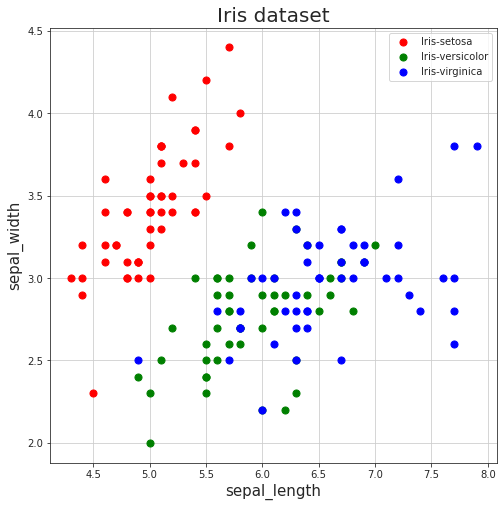

In [ ]:
plot(df, xattribute = 'sepal_length', yattribute = 'sepal_width')

This portion below will call the plot function made above to plot petal_length vs. petal_width

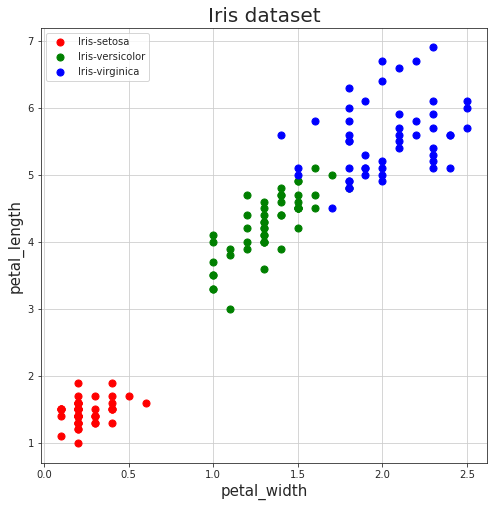

In [ ]:
plot(df, xattribute = 'petal_width', yattribute = 'petal_length')

## **PART 4**

Normalizing data by limiting the range of each feature to the 0 to 1 interval. We wrap the normalization within a function called `func` within another function called `normalize` and pass the the min and max values to it in order to caluclate the normalized value. The min and max are taken from the summary stats data structure from above. The outer function `normalize` returns a new data frame which is of the same structure as the data object we first create. This is important in order to be able to pass into the summaray statistics and pretty print functions above. 

In [ ]:
def normalize(df):
    
    df_stats = get_stats(df)
    
    def func(x, mx, mn):
        #Normalizing Formula (X-Xmin)/(Xmax-Xmin)
        return round((x - mn)/(mx - mn),4)
    
    df2 = deepcopy(df)
    
    for flower in df2:
        for attribute in df2[flower]:
            
            #Get current[species/flower][attribute] min and max values
            mn = df_stats['min'][attribute]
            mx = df_stats['max'][attribute]
            
            #store the new normalize value in df2
            df2[flower][attribute] = [func(x,mx,mn) for x in df[flower][attribute]]

    return df2


#Normalize
df_norm = normalize(df)

#Normalize stats
df_norm_stats =  get_stats(df_norm)

#Print normalize stats
pretty_print(df_norm_stats)



#plot(df_norm, xattribute = 'sepal_length', yattribute = 'sepal_width')
#plot(df_norm, xattribute = 'petal_width', yattribute = 'petal_length')

	sepal_length	sepal_width	petal_length	petal_width
count 	150		150		150		150		
mean 	0.4287		0.4392		0.4676		0.4578		
std 	0.23		0.1807		0.2991		0.318		
min 	0.0		0.0		0.0		0.0		
max 	1.0		1.0		1.0		1.0		
sum 	64.3054		65.8749		70.1349		68.667		


## **PART 5**
### Bonus Optional

Plotting Histograms for features and their correlation. Here we use seaborn's load_dataset function to load in the already existant and popular iris data in order to pairs plot the features amongst each other. 

In [ ]:
import seaborn as sb

#Data frame
dftab = sb.load_dataset("iris")
sb.set_style("ticks")

sb.pairplot(dftab, hue='species', diag_kind="auto", kind ="scatter", palette="husl")
plt.show()

#### **Conclusion from plot:**

From the above pairs plot it looks as if petal width and petal length are the most linearly separable amongst the different species. These make them the best to use in a decision tree classifier upon selecting proper thresholds. For petal length the best thresholds seem to be around 2.2 and 4.5 and for petal width, 0.8 and 1.8.

## **PART 6**

Below we are using the petal length and petal width as attributes building a decision tree classifier

In [ ]:
def model(petal_length, petal_width):
    species = ''
    
    #Setosa
    if petal_length < 2.2:
        species = 'setosa'
    
    #versicolor or virginica
    elif 2.2 <= petal_length:
        if petal_length < 6:
            if 0.8 < petal_width < 1.6:
                species = 'versicolor'
            if 1.6 < petal_width < 3:
                species = 'virginica'        
        else:
            species = 'virginica'
    #Virginica        
    else:
        species = 'virginica'
        
    return species




file = 'iris.csv'
correct = 0


with open(file, 'r') as csv_file:
    reader = csv.reader(csv_file)
    next(reader)

    
    for row in reader:
        petal_length = float(row[2])
        petal_width = float(row[3])
        if model(petal_length, petal_width) == row[4]:
            correct = correct + 1


print('Accuracy for model:',correct/150)

## **Project Notes**

*   For 


*   For part 6, looking back at section 5 was quite useful in order to view the values needed when creating our if-elif-else statement. These values helped made decisions in our if-elif-else statement when building our decision tree classifier. 
The main if-elif-else statement use petal length to separated the first part for setosa ("if petal_length < 2.2:") , second part to identify either versicolor or virginica ("elif 2.2 <= petal_length:"), last part for virginica ("else:"). The middle part of the main statement used petal_width to differentiate between versicolor and virginica.




## **Conclusion** 

  This assignment helped some of us in the group get accustomed to jupyter notebook by using it for the first time others in the group have already been using jupyter notebook. It also helped introduce google collab.

  In this assignment we used list, tuples, functions, dictionaries, csv files as in previous assignments but developed this knowledge much farther. We also included the use of deepcopy, dictionary of dictionaries, more calculations, and most importantly plot such as scatterplots and histograms.


## **References** 

    “Pyplot Scatter - matplotlib.pyplot.scatter() in Python." GeeksforGeeks,
        https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
        
     “Seaborn - Visualizing Pairwise Relationship.” Tutorialspoint,
        www.tutorialspoint.com/seaborn/seaborn_visualizing_pairwise_relationship.htm. 